In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# from mod.unique_value import checking_unique_value
from sklearn.impute import KNNImputer

Aperçu du DataFrame:
   ObjectId                          Country ISO2      ISO3  \
0         1               Advanced Economies  NaN     AETMP   
1         2  Advanced Economies excluding US  NaN  EAEUSTMP   
2         3                           Africa  NaN    AFRTMP   
3         4                         Americas  NaN    AMETMP   
4         5                             Asia  NaN   ASIATMP   

                           Indicator   Unit  \
0  Climate Altering Land Cover Index  Index   
1  Climate Altering Land Cover Index  Index   
2  Climate Altering Land Cover Index  Index   
3  Climate Altering Land Cover Index  Index   
4  Climate Altering Land Cover Index  Index   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...    ECCCA   
1  Food and Agriculture Organization of the Unite...    ECCCA   
2  Food and Agriculture Organization of the Unite...    ECCCA   
3  Food and Agriculture Organization of the Unite...    E

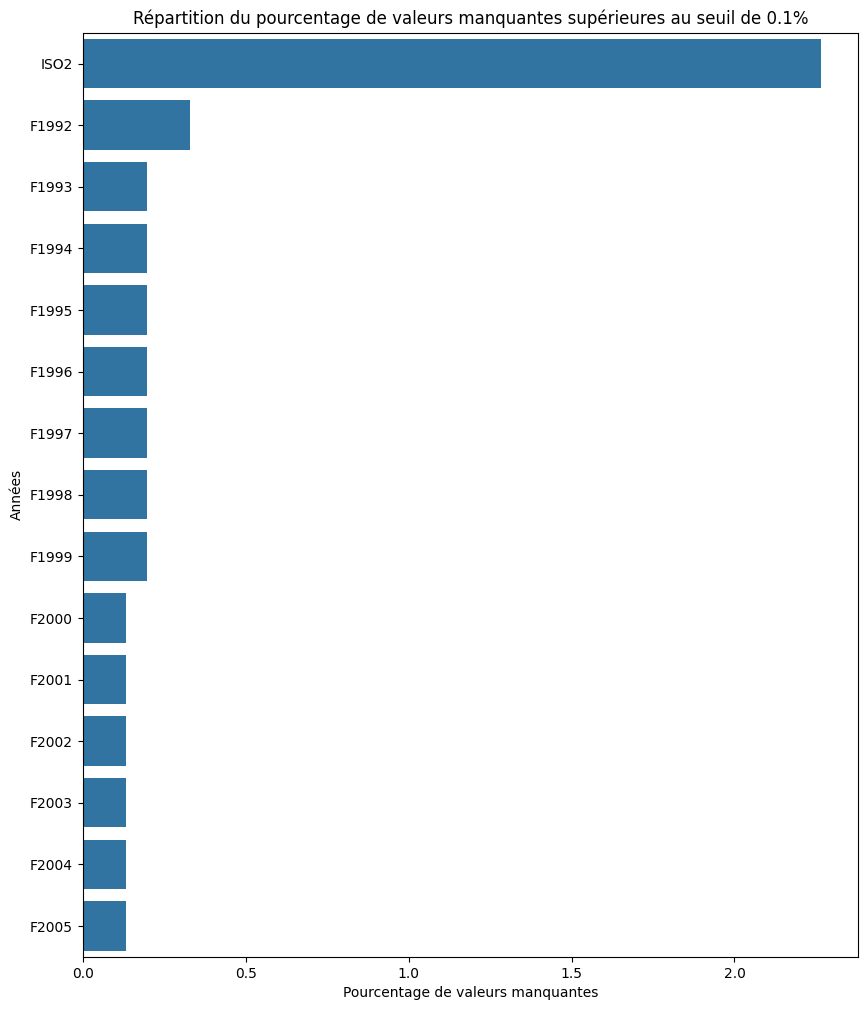

In [6]:
def analyze_csv(csv_file_path):
    # Lecture du fichier CSV et création du DataFrame
    df = pd.read_csv(csv_file_path)
    df = pd.DataFrame(df)

    # Aperçu du DataFrame
    print("Aperçu du DataFrame:")
    print(df.head())  # Affiche les premières lignes du DataFrame
    print("\nColonnes du DataFrame:")
    print(df.columns)  # Affiche les noms des colonnes
    print("\nInformations sur le DataFrame:")
    print(df.info())  # Affiche des informations sur le DataFrame
    print("\nDescription du DataFrame:")
    print(df.describe().round(2))  # Affiche les statistiques descriptives du DataFrame

    # Vérification des valeurs uniques dans chaque colonne
    def checking_unique_value(df):
        unique_values = [df[col].nunique() for col in df]
        for col, values in zip(df.columns, unique_values):
            print(f"Valeurs uniques dans la colonne '{col}': {values}")

    print("\nValeurs uniques dans chaque colonne:")
    checking_unique_value(df)

    # Sélection des colonnes numériques
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    print(numeric_columns)

    # Vérification des valeurs manquantes
    print("\nNombre de valeurs manquantes par colonne:")
    print(df.isnull().sum())

    # Pourcentage de valeurs manquantes par colonne
    percent_missing = df.isnull().sum() * 100 / len(df)
    print("\nPourcentage de valeurs manquantes par colonne:")
    print(percent_missing.round(2))
    
    threshold_view = 0.1

    filtered = percent_missing[percent_missing.values > threshold_view]
    plt.figure(figsize=(10, 12)) 
    ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
    ax.set_title(f"Répartition du pourcentage de valeurs manquantes "
                 f"supérieures au seuil de {threshold_view}%");
    ax.set_xlabel("Pourcentage de valeurs manquantes")
    ax.set_ylabel("Années")
    
    plt.show()

# Exemple d'utilisation de la fonction
analyze_csv('./Land_Cover_Accounts.csv')
